In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('environmental_socioeconomic.csv')
data.head()

,co2_emissions,waste_production,gdp,population
0,218.543053,436.276737,39199.932440,6.417631e+07
1,477.821438,399.620887,17380.479824,4.646995e+07
2,379.397274,258.538521,23865.587775,9.648535e+07
3,319.396318,646.540003,36531.225474,2.267887e+07
4,120.208388,528.961744,29283.573781,5.919779e+07


In [ ]:
data.shape

(10000, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)

print(pd.DataFrame(data_scaled,columns=data.columns).head())


   co2_emissions  waste_production       gdp  population
0      -0.415900         -0.452465  0.801884    0.482494
1       1.587377         -0.593258 -1.100359   -0.136414
2       0.826917         -1.135149 -0.534981    1.611824
3       0.363328          0.355146  0.569224   -0.968007
4      -1.175669         -0.096466 -0.062635    0.308475


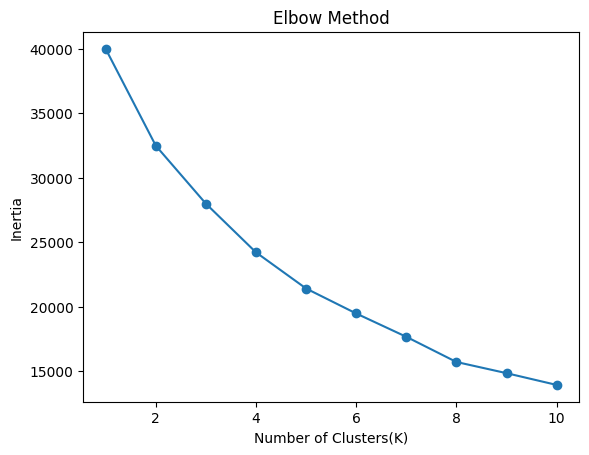

In [ ]:
# --------------------------------------------------------------
# 🔹 K-MEANS CLUSTERING (BASELINE COMPARISON)
# --------------------------------------------------------------
# We start with K-Means because:
# 1️⃣ It gives quick cluster groupings on large datasets
# 2️⃣ It helps estimate a good number of clusters using the Elbow / Silhouette
# 3️⃣ It provides a baseline to compare against Hierarchical Clustering
#
# After evaluating K-Means performance (inertia + silhouette score),
# we will proceed to Hierarchical Clustering to observe:
# ✔ Whether it forms similar or more meaningful clusters
# ✔ How clusters merge at different distance thresholds (dendrogram!)
#
# In short:
# ➤ K-Means = Fast, scalable, centroid-based clustering
# ➤ Hierarchical = Interpretable, tree-like clustering insight
#
# Running K-Means first helps us justify the cluster count
# BEFORE applying Hierarchical Clustering for comparison.
# --------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
#use elbow method to find the optimal number of clusters

inertia=[]
k_range=range(1,11)

for k in k_range:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(data_scaled)
  inertia.append(kmeans.inertia_)

#plot the inertia values to find the elbow
plt.plot(k_range,inertia,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Applying K-Means clustering with k=2(example value)

k = 3

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model on the scaled data and assign cluster labels
data['cluster'] = kmeans.fit_predict(data_scaled)

# Display the first few rows including the assigned clusters
print(data.head())


   co2_emissions  waste_production           gdp    population  cluster
0     218.543053        436.276737  39199.932440  6.417631e+07        0
1     477.821438        399.620887  17380.479824  4.646995e+07        2
2     379.397274        258.538521  23865.587775  9.648535e+07        2
3     319.396318        646.540003  36531.225474  2.267887e+07        1
4     120.208388        528.961744  29283.573781  5.919779e+07        0


Silhouette score : 0.17103994953101193


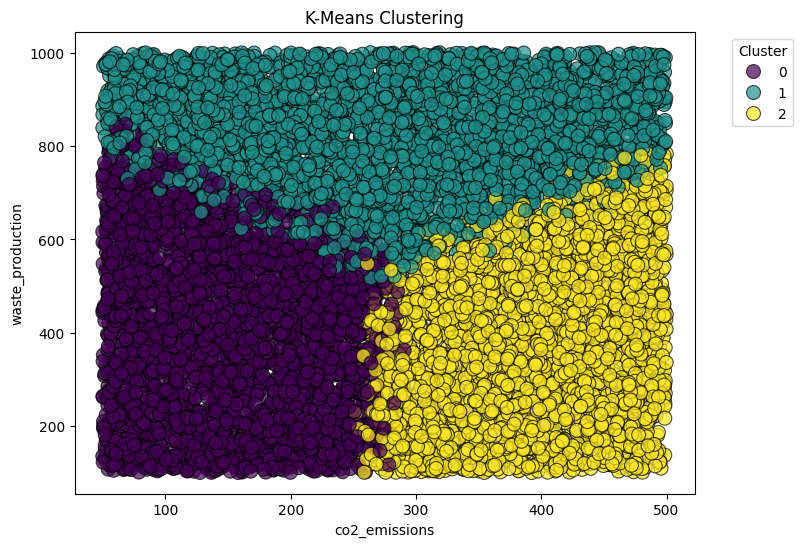

In [ ]:
#calculate Silhouette score

sil_score=silhouette_score(data_scaled,data['cluster'])
print("Silhouette score :",sil_score)

import seaborn as sns
import matplotlib.pyplot as plt
#assuming 'data' already contains the cluster labels (from the kmeans model)
#we'll use 2 features To plot : 'carbon emission' and 'pollution_level'

plt.figure(figsize=(8,6))
#create a scatter plot wit cluster labels

sns.scatterplot(  x='co2_emissions',y='waste_production',hue='cluster',data=data,palette='viridis',s=100,alpha=0.7,edgecolor='k')

#title and labels
plt.title('K-Means Clustering')
plt.xlabel('co2_emissions')
plt.ylabel('waste_production')
plt.legend(title='Cluster',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()


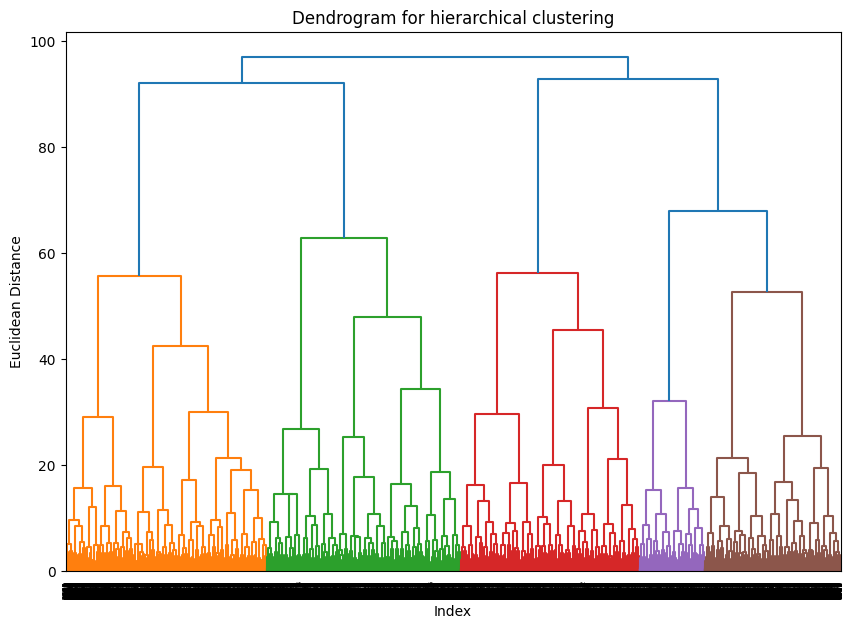

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# create a dendrogram to visualize the hierarchical clustering proces

plt.figure(figsize=(10,7))
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='ward'))
plt.title("Dendrogram for hierarchical clustering")
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
#apply AgglomerativeClustering
#lets assume we decide on 4 cluster based on the dendogram
#removed 'affinity'='Euclidean' and its redundant and causes the error with ward

hierarchical_clustering=AgglomerativeClustering(n_clusters=4,linkage='ward')
data['cluster']=hierarchical_clustering.fit_predict(data_scaled)

data.head()

,co2_emissions,waste_production,gdp,population,cluster
0,218.543053,436.276737,39199.932440,6.417631e+07,3
1,477.821438,399.620887,17380.479824,4.646995e+07,2
2,379.397274,258.538521,23865.587775,9.648535e+07,2
3,319.396318,646.540003,36531.225474,2.267887e+07,1
4,120.208388,528.961744,29283.573781,5.919779e+07,1


In [ ]:
#calculate Silhouette score

sil_score=silhouette_score(data_scaled,data['cluster'])
print("Silhouette score :",sil_score)

Silhouette score : 0.13124908918954956


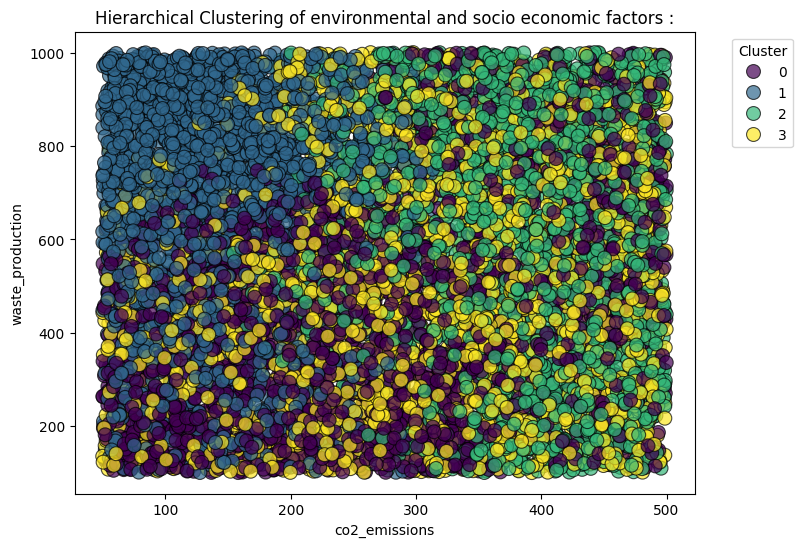

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#we'll use 2 features To plot : 'carbon emission' and 'waste_production'

plt.figure(figsize=(8,6))
#create a scatter plot wit cluster labels

sns.scatterplot(  x='co2_emissions',y='waste_production',hue='cluster',data=data,palette='viridis',s=100,alpha=0.7,edgecolor='k')

#title and labels
plt.title('Hierarchical Clustering of environmental and socio economic factors :')
plt.xlabel('co2_emissions')
plt.ylabel('waste_production')
plt.legend(title='Cluster',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Model deveplopment - Logistics Regression
x=data[['co2_emissions','waste_production',	'gdp'	,'population']]
y=data['cluster']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print(y_pred)

# accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy=",accuracy)


[3 2 3 ... 3 3 0]
Accuracy= 0.526
